In [97]:
# install the required libraries
# !pip install numpy panda scikit-learn

Importing the libraries

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [99]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [100]:
# divide in X and y
features_name = ['Age', 'EstimatedSalary']
label_name = 'Purchased'
X = dataset[features_name]
y = dataset[label_name]

In [101]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [102]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

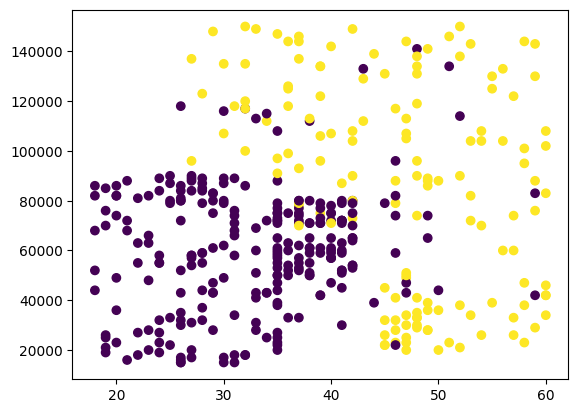

In [103]:
plt.scatter(dataset['Age'], dataset['EstimatedSalary'], c=dataset[label_name] )

Splitting the dataset into the Training set and Test set

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=.2
)

Fitting Decision Tree Classification to the Training set

In [105]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Predicting the Test set results

In [106]:
y_pred = model.predict(X_test)

Making the Confusion Matrix

In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[46,  6],
       [ 7, 21]], dtype=int64)

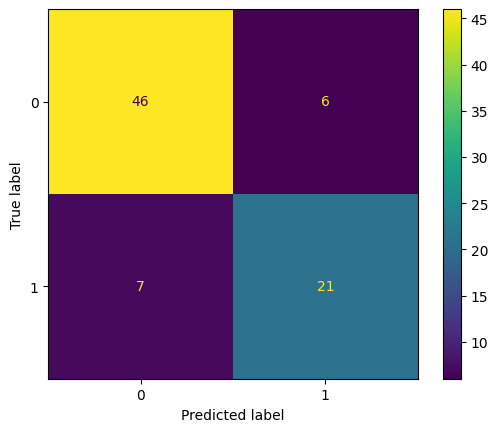

In [117]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm).plot()

Visualising the Training set results

c:\Users\DELL\disk\brtc\iac\intro_to_ai_bk_29\.conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\DELL\AppData\Local\Temp\ipykernel_5992\2492665137.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(_X.iloc[:, 0], _X.iloc[:, 1],


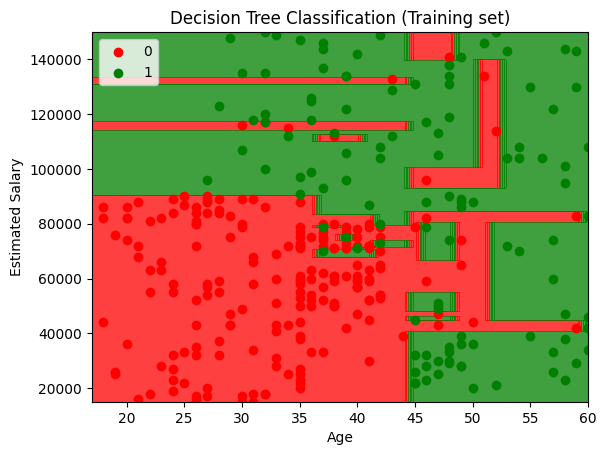

In [108]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1),
                     np.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    _X = X_set[y_set == j]
    plt.scatter(_X.iloc[:, 0], _X.iloc[:, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

c:\Users\DELL\disk\brtc\iac\intro_to_ai_bk_29\.conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\DELL\AppData\Local\Temp\ipykernel_5992\4209731548.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(_X.iloc[:, 0], _X.iloc[:, 1],


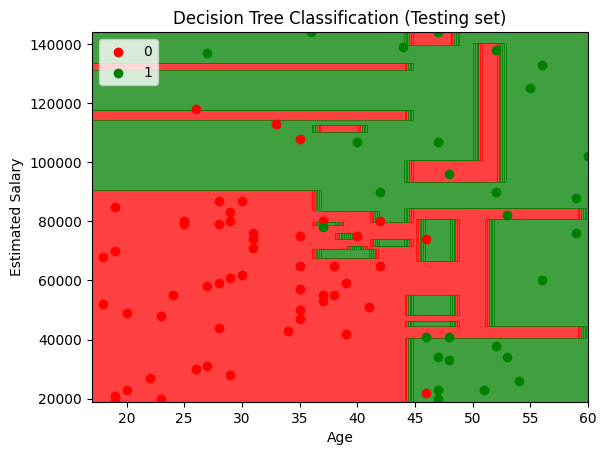

In [109]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1),
                     np.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    _X = X_set[y_set == j]
    plt.scatter(_X.iloc[:, 0], _X.iloc[:, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Decision Tree Classification (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

c:\Users\DELL\disk\brtc\iac\intro_to_ai_bk_29\.conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\DELL\AppData\Local\Temp\ipykernel_5992\3103145551.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(_X.iloc[:, 0], _X.iloc[:, 1],


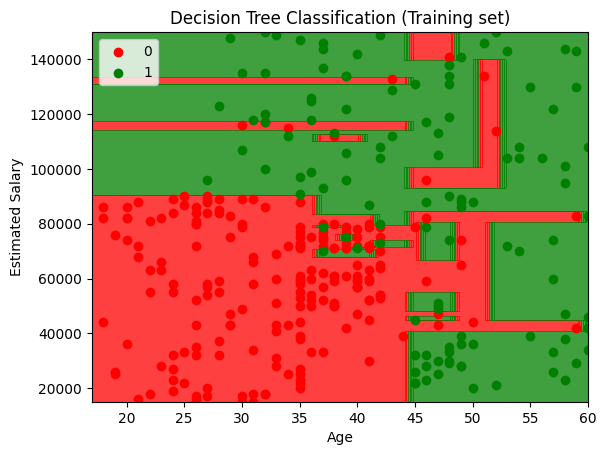

In [111]:
def plotting_boundaries(X, y, model, set_name):
    from matplotlib.colors import ListedColormap
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1),
                        np.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1))
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        _X = X_set[y_set == j]
        plt.scatter(_X.iloc[:, 0], _X.iloc[:, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)

    plt.title(f'Decision Tree Classification ({set_name} set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

plotting_boundaries(X_train, y_train, model, set_name='Training')
